In [16]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
df_demandas = pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas',
                          index_col='date',
                          parse_dates=True)['demandas']

In [18]:
'''
order(
      p = defini a ordem do polinômio autorregressivo,
      d = defini a ordem do operador de diferença simples,
      q = defini a ordem do polinômio média móvel simples
      )
      
seasonal_order(
               P = defini a ordem do polinômio autorregressivo sazonal,
               D = defini a ordem do operador de diferença sazonal,
               Q = defini a ordem do polinômio média móvel sazonal,
               s = é um inteiro que dá a periodicidade (número de períodos na temporada)
               )
'''
#nosso s seria 52

params={
    'freq':'7d',
    'tren':'ct',
    'order':(5,1,3),
    'seasonal_order':(1,1,1,52),
}

In [19]:
df_train, df_test = df_demandas.iloc[:166],df_demandas.iloc[166:]

In [20]:
model=sm.tsa.statespace.SARIMAX(df_train,**params)
results=model.fit()

C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few obse

In [21]:
previsao_test = results.predict(start=len(df_train),end=len(df_train)+len(df_test)-1,dynamic=True)

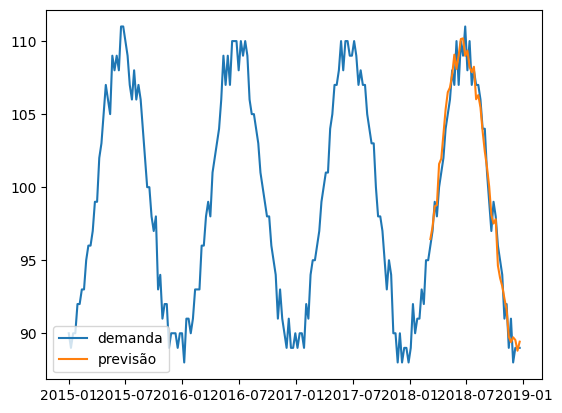

In [22]:
plt.plot(df_demandas,label='demanda')
plt.plot(previsao_test,label='previsão')
plt.legend()

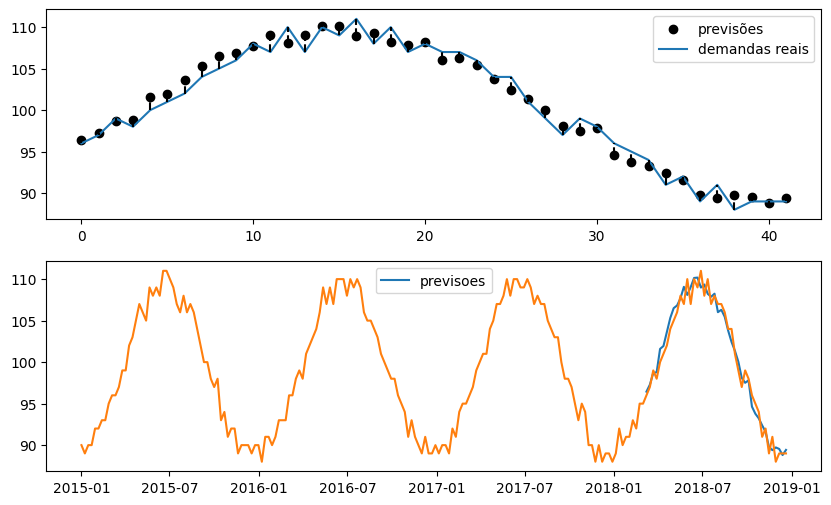

In [23]:
fig=plt.figure(figsize=(10,6))

ax=fig.add_subplot(2,1,1)

plt.scatter(range(len(df_test)),previsao_test,label='previsões',color='black')
plt.plot(range(len(df_test)),df_test,label='demandas reais')
plt.legend()

indice = 0 
for i in range(len(previsao_test)):
    if previsao_test[i] > df_test.iloc[i]:
        plt.vlines(x=i, ymin=df_test.iloc[i], ymax=previsao_test[i],linestyle='--',color='black')
    else:
        plt.vlines(x=i, ymin=previsao_test[i], ymax=df_test.iloc[i],linestyle='--',color='black')
    indice+=1

ax=fig.add_subplot(2,1,2)
plt.plot(previsao_test,label='previsoes')
plt.plot(df_demandas)
plt.legend()

In [24]:
import numpy as np

In [25]:
residuos = np.array(df_test)-np.array(previsao_test)

$e_{i} = y_{i}-\hat{y}_{i}\sim N\left(0,30\right)$

In [26]:
import seaborn as sns

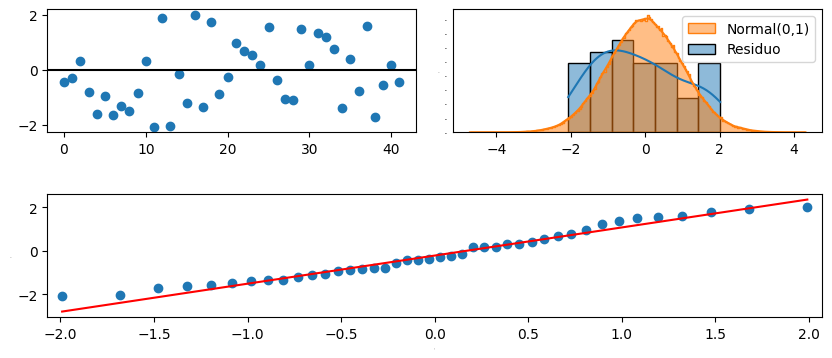

In [27]:
fig=plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=0.1, hspace=0.5)

ax=fig.add_subplot(2,2,1)

plt. axhline(y=0,xmin=0,xmax=len(df_test),color='black')
plt.scatter(range(len(residuos)),residuos)

ax=fig.add_subplot(2,2,2)
sns.histplot(residuos,kde=True,stat='density',label="Residuo")
sns.histplot(np.random.normal(0, 1,200000),kde=True,stat='density',element='step',label='Normal(0,1)')
plt.legend()
plt.tick_params(axis='y', labelsize=0, length=0)
plt.ylabel([], fontsize=0)

ax=fig.add_subplot(2,1,2)
sm.qqplot(residuos,line='q',ax=ax)
plt.ylabel([], fontsize=0)
plt.xlabel([], fontsize=0)
plt.show()

In [28]:
import statsmodels.api as sm

#print('MSE_Teste =',sm.tools.eval_measures.mse(previsoes_test, df_test.y, axis=0))

print('RMSE_Teste =',sm.tools.eval_measures.rmse(previsao_test, df_test, axis=0))

print('MAE_Teste =',sm.tools.eval_measures.meanabs(previsao_test, df_test, axis=0))

RMSE_Teste = 1.1627384932508193
MAE_Teste = 1.0023256847564956


MAE = $\frac{1}{n}\sum_{i=1}^{n}\mid y_{i}-\hat{y}\mid$ 

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y}\right)^{2}}$

# Fase de Previsão

In [29]:
qtd_previsoes = 52

In [ ]:
for i in range(30):
        
    model = sm.tsa.statespace.SARIMAX(df_demandas,**params)
    results = model.fit()
    previsao = results.predict(start=len(df_demandas),end=len(df_demandas)+qtd_previsoes-1,dynamic=True)
    with open(f"C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Previsoes/Prev_sar/Previsao_sar{i}.txt", "w") as arquivo:
        n = len(previsao)
        for j in range(n-1):
            arquivo.write(f'{previsao[j]}, ')
        arquivo.write(f'{previsao[n-1]}')